## ML-Based Fake Job Postings Detector Using NLP and Machine Learning

**Projec flow:**

1. Importing the libraries
2. Data Loading & Understanding the data
3. EDA ( Handling missing & few)
4. Text Preprocessing ( Cleaning the text through converting to lowercase, remove punctuations, stopwords and tokenize the words)
5. Feature Extraction or Text Representation (using TF-IDF ( convert text into numbers that ML models can understand ))
6. Train/Test split.
7. Model Training 
8. Model Evaluation 
9. Tested with new samples
 

In [219]:
!pip install numpy==2.2.3

In [220]:
import numpy as np

In [221]:
print(np.__version__)

2.2.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Ajay/Desktop/Python/Fake Job Detector/fake_job_postings.csv")

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Dataset contains the following columns

- **job_id**	:  Unique identifier for each job posting. 

- **title**	Job title (e.g., Marketing Intern). 

- **location**	Geographic location of the job. 

- **department**	Corporate department of the job (e.g., Sales, Engineering). 

- **salary_range**	Expected salary range; text values like $50k–$60k. 

- **company_profile**	Brief description about the company. 

- **description**	Detailed job description. 

- **requirements**	Skills/qualifications required. 

- **benefits**	Benefits offered by the employer. 

- **telecommuting**	Indicates whether the job allows remote work (work from home) — typically 1 if yes, 0 if no. 

- **has_company_logo**	Binary — whether the posting includes a company logo. 

- **has_questions**	Binary — whether the posting has applicant screening questions. 

- **employment_type**	Type of employment: Full-time, Part-time, Contract, etc. 

- **required_experience**	Experience required: Entry level, Mid-senior, Intern, etc. 

- **required_education**	Minimum education needed (e.g., Bachelor’s, Master’s). 

- **industry**	Sector the company belongs to (IT, Healthcare, Real Estate, etc.). 

- **function**	Functional role type (e.g., Engineering, Research, Sales). 
- **fraudulent**	Target variable: 1 for fake job, 0 for real job. 


In [5]:
df['company_profile'][0]

"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City."

## EDA

In [6]:
df.shape

(17880, 18)

In [227]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
((df.isnull().sum() / len(df)) *100).sort_values(ascending=False)

salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.335570
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.078300
location                1.935123
description             0.005593
title                   0.000000
job_id                  0.000000
telecommuting           0.000000
has_questions           0.000000
has_company_logo        0.000000
fraudulent              0.000000
dtype: float64

### observations :

* As per above, columns like job_id ,telecommuting ,has_questions,has_company_logo,title ,fraudulent   has no null values.
* columns like salary_range, department, required_education, benefits, required_experience, function, industry, employment_type, company_profile, requirements, location, description has null values
         
           
                   
     

In [9]:
df.drop(['job_id','has_company_logo','has_questions','telecommuting', 'salary_range','department'], axis=1, inplace=True)

In [10]:
df.fillna('', inplace=True)

In [11]:
df.isnull().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [12]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [13]:
len(df['fraudulent'])

17880

percentage of Real jobs with class 0 :  95.1565995525727
percnetage of Fake jobs with class 1 :  4.8434004474272925


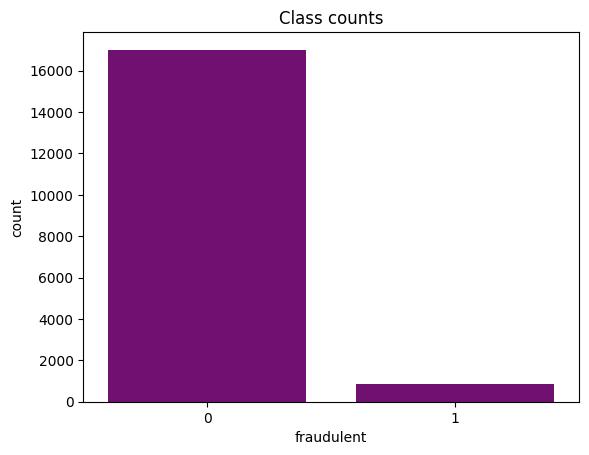

In [14]:
print('percentage of Real jobs with class 0 : ', (df['fraudulent'].value_counts()[0] / len(df['fraudulent'])) *100 )
print('percnetage of Fake jobs with class 1 : ', (df['fraudulent'].value_counts()[1] / len(df['fraudulent']) *100) )
sns.countplot(data=df, x='fraudulent', color='purple')
plt.title('Class counts')
plt.show()

In [15]:
df.describe(include='object')

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880
unique,11231,3106,1710,14802,11968,6205,6,8,14,132,38
top,English Teacher Abroad,"GB, LND, London",,"Play with kids, get paid for it Love travel? J...",,,Full-time,,,,
freq,311,718,3308,379,2696,7212,11620,7050,8105,4903,6455


In [239]:
df.head(2)

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0


## >> Visualizing insights 

In [240]:
df['required_experience'].value_counts()

required_experience
                    7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

In [241]:
exp=dict(df['required_experience'].value_counts())
del exp['']

In [242]:
exp

{'Mid-Senior level': np.int64(3809),
 'Entry level': np.int64(2697),
 'Associate': np.int64(2297),
 'Not Applicable': np.int64(1116),
 'Director': np.int64(389),
 'Internship': np.int64(381),
 'Executive': np.int64(141)}

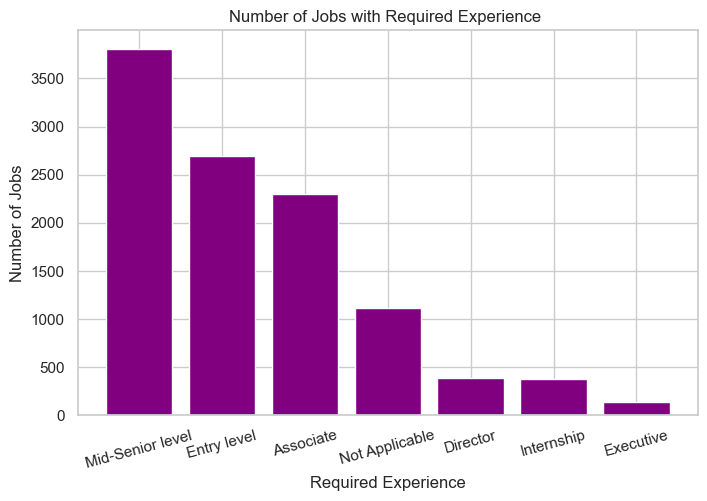

In [243]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
plt.bar(exp.keys(), exp.values(), color='purple')
plt.title("Number of Jobs with Required Experience ")
plt.xlabel("Required Experience")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=15)

plt.show()


In [244]:
df.sample(1)

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
7717,Senior Bank Mortgage Loan Originators for the ...,"US, WI, Brookfield",About The Symicor Group:Bankers Recruiting Ban...,"Bank Mortgage Loan Originator – Brookfield, WI...",,,,,,,,0


In [16]:
def split(location):
    l=location.split(',')
    return l[0]
df['country'] = df['location'].apply(split)

In [17]:
df['country'].value_counts() 

country
US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
HR        1
SV        1
JM        1
KZ        1
KH        1
Name: count, Length: 91, dtype: int64

In [18]:
country=dict(df['country'].value_counts()[:11])
del country['']
country

{'US': np.int64(10656),
 'GB': np.int64(2384),
 'GR': np.int64(940),
 'CA': np.int64(457),
 'DE': np.int64(383),
 'NZ': np.int64(333),
 'IN': np.int64(276),
 'AU': np.int64(214),
 'PH': np.int64(132),
 'NL': np.int64(127)}

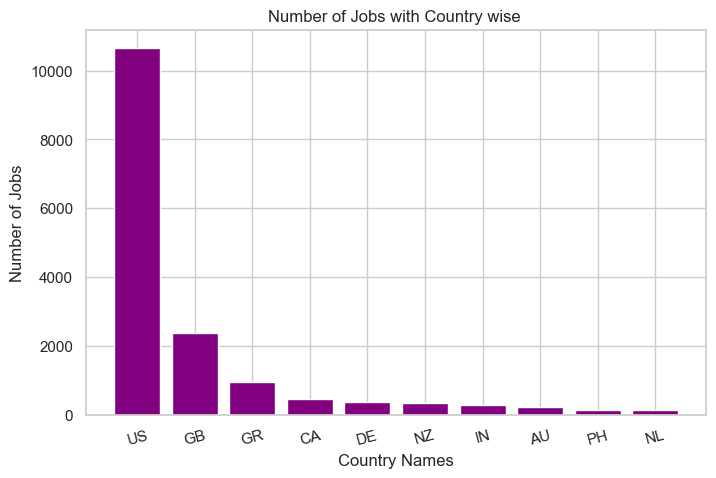

In [19]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
plt.bar(country.keys(), country.values(), color='purple')
plt.title("Number of Jobs with Country wise ")
plt.xlabel("Country Names")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=15)

plt.show()

In [20]:
df['required_education'].value_counts()

required_education
                                     8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

In [250]:
edu=dict(df['required_education'].value_counts()[:6])
del edu['']

In [251]:
edu

{"Bachelor's Degree": np.int64(5145),
 'High School or equivalent': np.int64(2080),
 'Unspecified': np.int64(1397),
 "Master's Degree": np.int64(416),
 'Associate Degree': np.int64(274)}

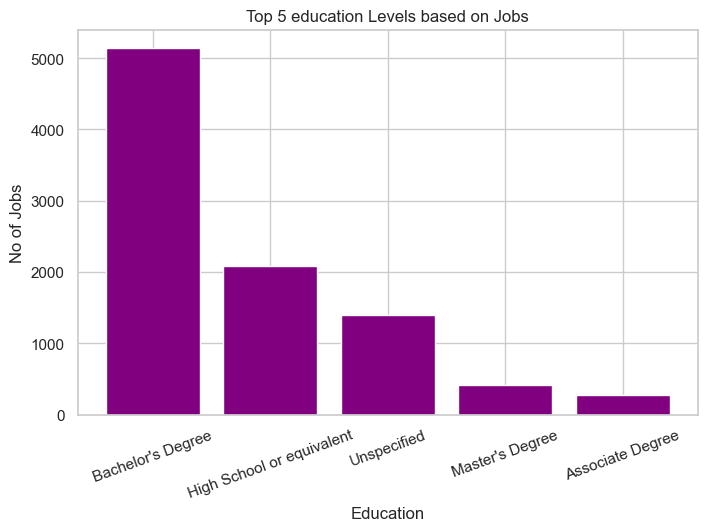

In [252]:
plt.figure(figsize=(8,5))
plt.bar(edu.keys(), edu.values(), color='purple')
plt.title('Top 5 education Levels based on Jobs')
plt.xlabel('Education')
plt.ylabel('No of Jobs')
plt.xticks(rotation=20)
plt.show()

In [253]:
df['employment_type'].value_counts()

employment_type
Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

In [254]:
industry=dict(df['industry'].value_counts()[:11])
del industry['']
industry

{'Information Technology and Services': np.int64(1734),
 'Computer Software': np.int64(1376),
 'Internet': np.int64(1062),
 'Marketing and Advertising': np.int64(828),
 'Education Management': np.int64(822),
 'Financial Services': np.int64(779),
 'Hospital & Health Care': np.int64(497),
 'Consumer Services': np.int64(358),
 'Telecommunications': np.int64(342),
 'Oil & Energy': np.int64(287)}

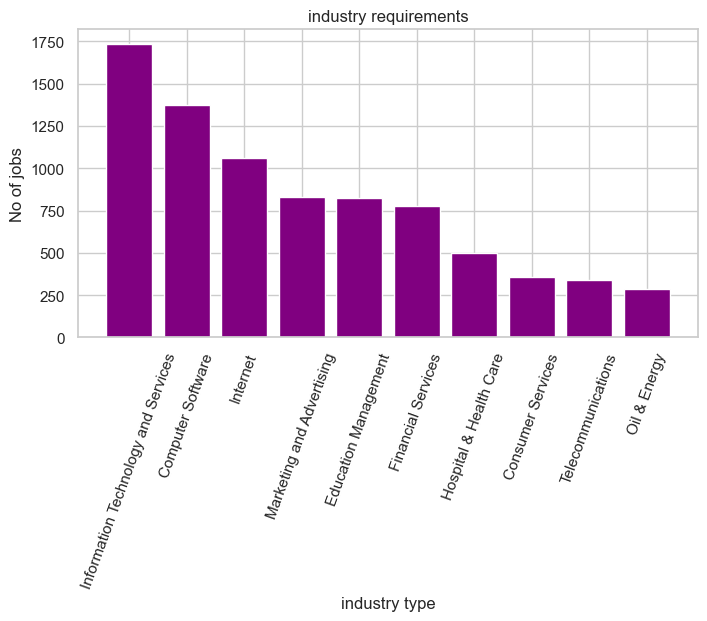

In [255]:
plt.figure(figsize=(8,4))
plt.bar(industry.keys(), industry.values(), color='purple')
plt.title('industry requirements')
plt.xlabel('industry type')
plt.ylabel('No of jobs')
plt.xticks(rotation=70)
plt.show()

In [256]:
emp_type=dict(df['employment_type'].value_counts())
del emp_type['']
emp_type

{'Full-time': np.int64(11620),
 'Contract': np.int64(1524),
 'Part-time': np.int64(797),
 'Temporary': np.int64(241),
 'Other': np.int64(227)}

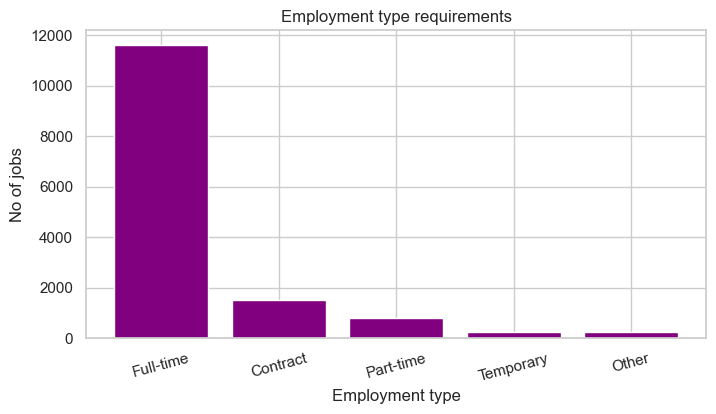

In [257]:
plt.figure(figsize=(8,4))
plt.bar(emp_type.keys(), emp_type.values(), color='purple')
plt.title('Employment type requirements')
plt.xlabel('Employment type')
plt.ylabel('No of jobs')
plt.xticks(rotation=15)
plt.show()

In [258]:
df.sample(1)

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,country
10156,ARE YOU EXPERIENCED & PASSIONATE ABOUT CHILD C...,,MISSION:GoldLeaf HomeCare is revolutionizing h...,"About the Company &amp; the Opportunity:""We ta...",Required Qualification:Over the age of 21 with...,We provide:* Competitive rates for PCP's per h...,,,,,,0,


In [21]:
print('Top 10 Real Jobs: ')
print()
df[df['fraudulent']==0]['title'].value_counts()[:10]

Top 10 Real Jobs: 



title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64

In [22]:
print('Top 10 Fake Jobs: ')
print()
df[df['fraudulent']==1]['title'].value_counts()[:10]

Top 10 Fake Jobs: 



title
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Payroll Clerk                                                           10
Name: count, dtype: int64

## >> Combine Text Features 

In [23]:
df['text']= df['title']+' '+df['company_profile']+' '+df['description']+' '+df['description']+' '+df['description']

In [24]:
df.drop(['title','location','company_profile',	'description',	'requirements',	'benefits',
         'employment_type',	'required_experience', 'required_education',	'industry',	'function','country'], axis=1, inplace=True)

In [25]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


## >> Wordcloud 

In [264]:
pip install wordcloud matplotlib  

In [29]:
from wordcloud import WordCloud, STOPWORDS  # wordcloud - quickly spotting the most common words visually

In [30]:
fraudjobs =df[df['fraudulent']==1].text
realjobs= df[df['fraudulent']==0].text

In [31]:
# WordCloud expects a single concatenated string, not a pandas Series:

fraud_text = " ".join(fraudjobs.astype(str).tolist())
real_text  = " ".join(realjobs.astype(str).tolist())

# ➡️ This combines all rows in each subset into a long string of words

In [32]:
# Optional: add custom stopwords beyond the default
stopwords = set(STOPWORDS)
stopwords.update(["job","work","position","role","will"])  # example extras

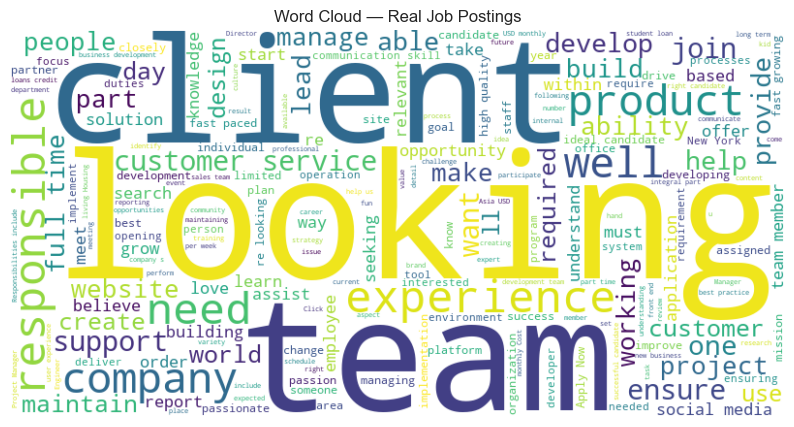

In [23]:
# Generate for real jobs
wc_real = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords).generate(real_text)

plt.figure(figsize=(10,6))
plt.imshow(wc_real, interpolation='bilinear')
plt.title("Word Cloud — Real Job Postings")
plt.axis("off")
plt.show()

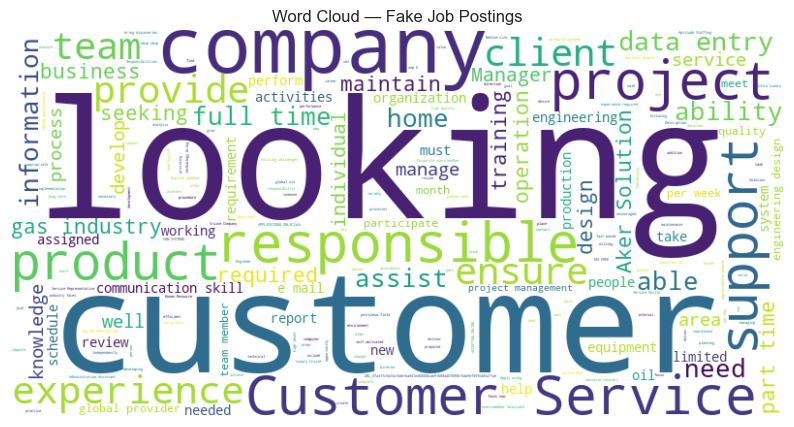

In [ ]:
wc_fraud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords).generate(fraud_text)

plt.figure(figsize=(10,6))
plt.imshow(wc_fraud, interpolation='bilinear')
plt.title("Word Cloud — Fake Job Postings")
plt.axis("off")
plt.show()

## Text Preprocessing

In [33]:
import nltk
import re                         #re is Python’s built-in regular expression
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [34]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
stop_words= set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

In [36]:
def preprocess_text(text):
    
    # 1. Lowercase & remove HTML
    text = BeautifulSoup(text, "html.parser").get_text()   # removing HTML tags, links
    text = text.lower()
    
    # 2. Remove URLs & non letters
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 4. Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    
    # 5. Lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    # 6. Rejoin
    return " ".join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

In [37]:
df['text'][0]

"Marketing Intern We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and cu

In [38]:
df['processed_text'][0]

'marketing intern food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management systemsrese

## Train / Test Split:

In [39]:
X = df['processed_text']
y = df['fraudulent']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# stratify=y means class proportions in y (target) are preserved in both train and test sets.
# ➡ Stratified splitting ensures that the class balance of your dataset is preserved when you divide it into training and testing sets.

## Feature Extraction --Vectorization

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1,2)
)


In [42]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.shape, X_test_vec.shape

((14304, 50000), (3576, 50000))

In [43]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert first 5 rows of the vectorized matrix
sample_df = pd.DataFrame(X_train_vec[:5].toarray(), columns=feature_names)

sample_df.head()


,aa,aa bb,aa bc,aa cf,aa dc,aa de,aa ed,aa ee,aa eytan,aa fd,...,zoning couch,zoopla,zoottle,zopa,zopa wool,zu,zullen,zweig,zweig letter,zylun
0,0.073145,0.0,0.0,0.0,0.0,0.053404,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train ML Models

## 1. LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced') # automatically adjusts weights,Useful for imbalance data  # Helps models learn better on minorityclasses
                             

log_model.fit(X_train_vec, y_train)
y_pred = log_model.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print()
print(classification_report(y_test, y_pred))

Accuracy: 0.9776286353467561

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3403
           1       0.73      0.84      0.78       173

    accuracy                           0.98      3576
   macro avg       0.86      0.91      0.89      3576
weighted avg       0.98      0.98      0.98      3576



## 2. SVM -- SVC

In [45]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svm_model = SVC(C=1.0, class_weight='balanced')   
#LinearSVC is usually faster and a better default choice,,TF-IDF vectors are high-dimensional and sparse, and LinearSVC scales well with that
svm_model.fit(X_train_vec, y_train)

y_pred_svc = svm_model.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", acc)
print()
print(classification_report(y_test, y_pred_svc))

Accuracy: 0.9818232662192393

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.96      0.65      0.78       173

    accuracy                           0.98      3576
   macro avg       0.97      0.83      0.88      3576
weighted avg       0.98      0.98      0.98      3576



## 3. XGBOOST

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train)  # handle imbalance, it scales the importance of the minority class during training
)

xgb_model.fit(X_train_vec, y_train)

y_pred = xgb_model.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print()

print(classification_report(y_test, y_pred))

c:\Users\Ajay\Desktop\Python\Fake Job Detector\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [08:11:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9818232662192393

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.81      0.81      0.81       173

    accuracy                           0.98      3576
   macro avg       0.90      0.90      0.90      3576
weighted avg       0.98      0.98      0.98      3576



## 4. NAIVE BAYES

In [48]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", acc)
print()

print(classification_report(y_test, y_pred_nb))

Accuracy: 0.9633668903803132

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       0.96      0.25      0.40       173

    accuracy                           0.96      3576
   macro avg       0.96      0.63      0.69      3576
weighted avg       0.96      0.96      0.95      3576



## 5. DECISION TREE CLASSIFIER

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train_vec, y_train)
y_pred_dt = dt_model.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", acc)
print()

print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9572147651006712

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3403
           1       0.55      0.66      0.60       173

    accuracy                           0.96      3576
   macro avg       0.77      0.82      0.79      3576
weighted avg       0.96      0.96      0.96      3576



## Hyperparameter Tunning

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],       # C- default regularization
    'kernel': ['linear','rbf'],
    'gamma': ['scale', 'auto']  # gamma only matters for non-linear kernels (like RBF),
}

grid = GridSearchCV(SVC(),
    param_grid=param_grid,
    scoring='f1',  # or 'accuracy', 'recall', etc.
    cv=3,
    verbose=True
)

grid.fit(X_train_vec, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: 0.7770672930531992


In [53]:
y_pred_grid = grid.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred_grid)
print("Accuracy:", acc)
print()

print(classification_report(y_test, y_pred_grid))

Accuracy: 0.9868568232662193

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.97      0.75      0.85       173

    accuracy                           0.99      3576
   macro avg       0.98      0.88      0.92      3576
weighted avg       0.99      0.99      0.99      3576



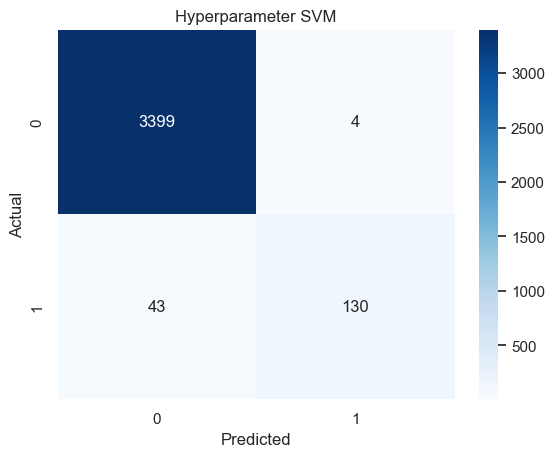

In [54]:
y_pred = grid.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title('Hyperparameter SVM')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Model Evaluation

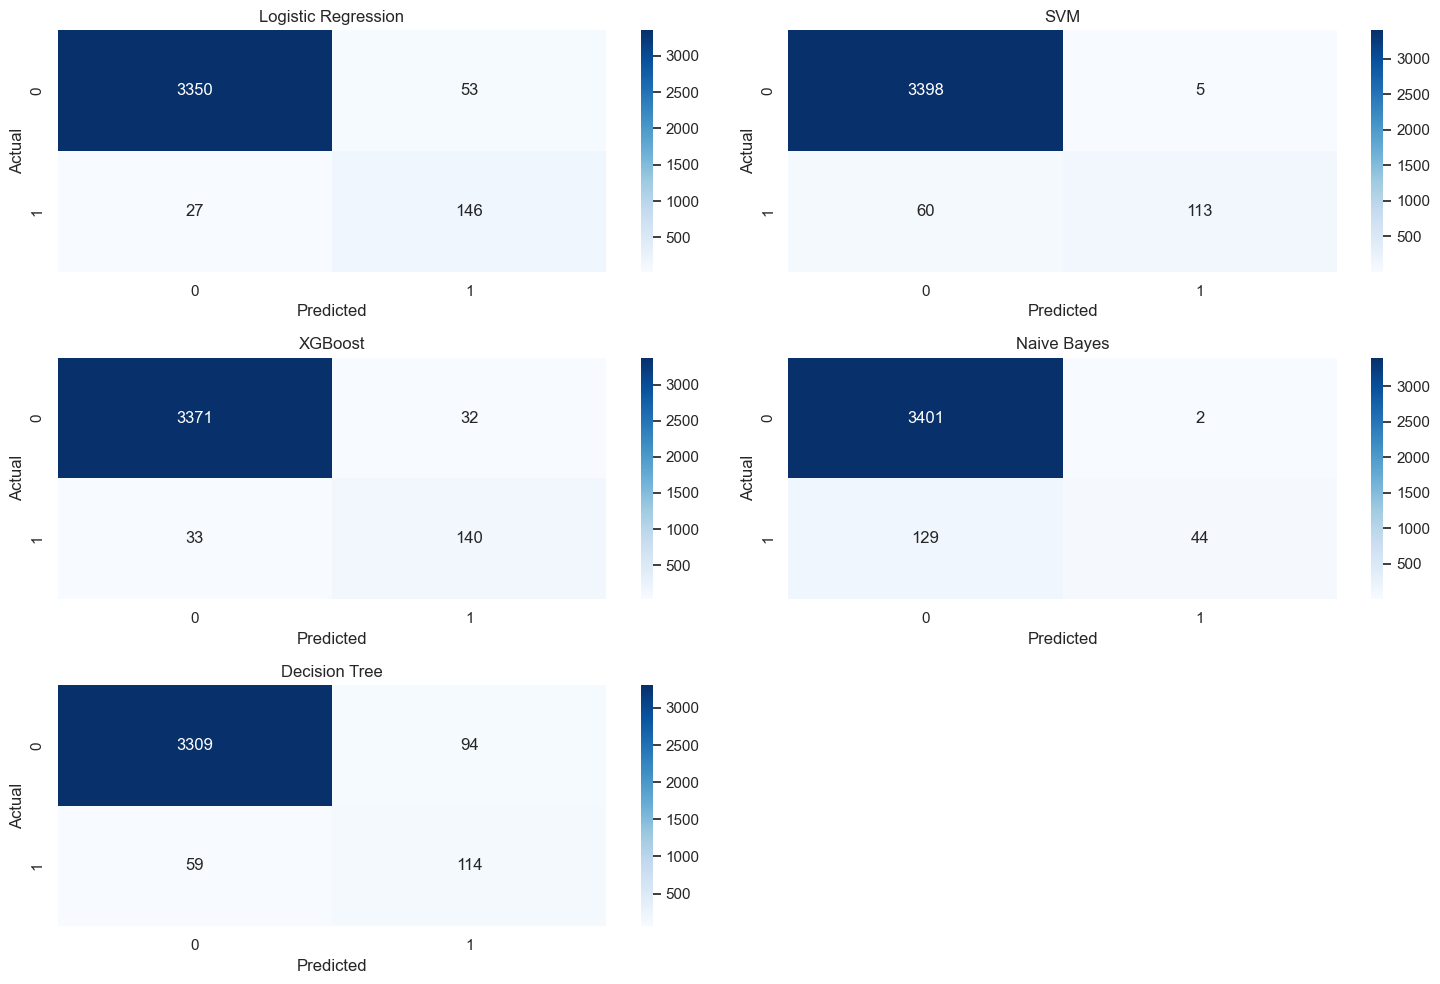

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model
}

plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items(), start=1):
    y_pred = model.predict(X_test_vec)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_vec)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),  # overall precision
        "Recall": recall_score(y_test, y_pred),        # overall recall
        "F1": f1_score(y_test, y_pred)                 # overall F1
    })

results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)

In [ ]:
results_df

,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.977629,0.733668,0.843931,0.784946
SVM,0.981823,0.957627,0.653179,0.776632
XGBoost,0.981823,0.813953,0.809249,0.811594
Naive Bayes,0.963367,0.956522,0.254335,0.401826
Decision Tree,0.958613,0.564767,0.630058,0.595628


<Figure size 1000x800 with 0 Axes>

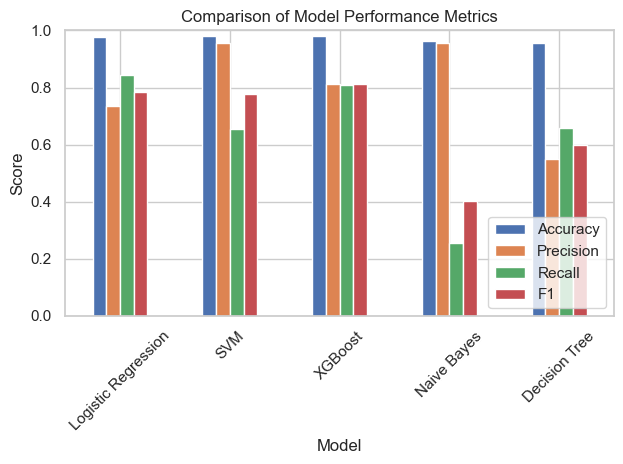

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
results_df[['Accuracy', 'Precision', 'Recall', 'F1']].plot(
    kind='bar', rot=45
)
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)   # since these metrics range from 0 to 1
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## ROC - AUC

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score 

svm_prob = SVC(
    kernel='linear',         # use a linear boundary between classes
    probability=True,        # enable probability estimates
    class_weight='balanced'  # adjust weights for class imbalance
)
svm_prob.fit(X_train_vec, y_train)

y_proba = svm_prob.predict_proba(X_test_vec)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC (SVC with proba):", roc_auc)

ROC AUC (SVC with proba): 0.9776463813805908


In [59]:
import pickle


## Saving Models

In [ ]:

with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("xtrain.pkl", "wb") as f:
    pickle.dump(X_train_vec, f)

In [61]:
with open("log_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

## Checking My Model

In [62]:
df[['text','fraudulent']].iloc[0:5]

,text,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


In [71]:
df['text'][22]

'Engagement Manager  Upstream’s mission is to revolutionise the way companies market to consumers through cutting edge technology. This is an opportunity to collaborate with like-minded people in an environment that embraces individual differences and diversity.We offer a challenging and stimulating environment in which employees have the opportunity to work on a vast range of complex projects at the forefront of technical innovation. We are looking for creative, enthusiastic and open-minded individuals to join our innovative team to help both drive our success and uphold our existing reputation within the marketing technology world.What we believeOur values of integrity, perseverance, innovation and respect are at the heart of our company. Our actions are underpinned by these four values, which have become central to Upstream, providing all of our employees with a clear framework from which to make their decisions.1. Integrity &amp; TrustYou are widely trusted and seen as a direct and

In [74]:
df['fraudulent'][22]

np.int64(0)

In [69]:
# 1. Simple function to test one text
def predict_single(text):

    # already did preprocessing before training, applying it here
    text_processed = preprocess_text(text)  

    # convert to TF-IDF vector
    X = vectorizer.transform([text_processed])

    # predict
    pred = log_model.predict(X)[0]   

    # print result
    if pred == 1:
        print("Prediction: Fake Job Posting")
    else:
        print("Prediction: Real Job Posting")

# 2. Example usage
sample = "This job offers free gifts and quick money with no interview."
predict_single(sample)

sample2 = "We are hiring a software developer with 3+ years experience."
predict_single(sample2)

sample3 = "Urgent! Earn $5000/week from home — no experience required."
predict_single(sample3)

sample4 = "Work from home, no skills needed, click link to earn money fast."
predict_single(sample4)


Prediction: Real Job Posting
Prediction: Real Job Posting
Prediction: Fake Job Posting
Prediction: Fake Job Posting


In [67]:
df[df['fraudulent']==0].text.iloc[0]

"Marketing Intern We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and cu

In [ ]:
df[df['fraudulent']==1].text.iloc[98]

'Payroll Data Coordinator Positions - Earn $100-$200 Daily   We are a full-service marketing and staffing firm, serving companies ranging from Fortune 100 to new start-up organizations. We work with job seekers in an equally broad range, from light industrial temporary workers to executive level candidates.Are you looking for a Work from Home Opportunity where you can earn up to $2500 and more per week? Our Online Service Representative position would be perfect for you!- Set your own hours - Make money every time you decide to work - Work remotely from home - Get paid weekly - If you have a computer with internet, this is for you We are a full-service marketing and staffing firm, serving companies ranging from Fortune 100 to new start-up organizations. We work with job seekers in an equally broad range, from light industrial temporary workers to executive level candidates.Are you looking for a Work from Home Opportunity where you can earn up to $2500 and more per week? Our Online Serv

## Shap ( Explainable AI ):

In [70]:
import shap

c:\Users\Ajay\Desktop\Python\Fake Job Detector\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# SHAP needs dense matrix for linear models
explainer = shap.LinearExplainer(log_model, X_train_vec, feature_names=vectorizer.get_feature_names_out())

In [ ]:
text = "We are hiring a software developer with 3+ years experience."
vec = vectorizer.transform([text])

shap_values = explainer.shap_values(vec)

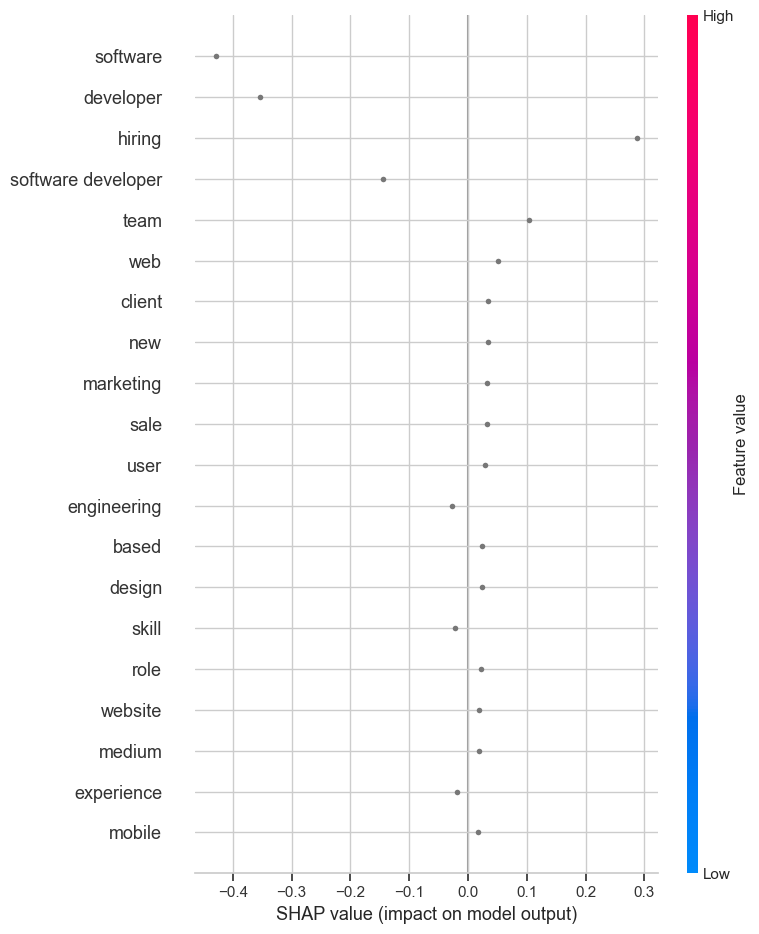

In [ ]:
shap.summary_plot(shap_values, vec, feature_names=vectorizer.get_feature_names_out())

## From the above Observation:

 Direction: Fake vs Real jobs :
 
🔴 / Right side → Fake Job

Positive SHAP values

Push prediction towards Fake Job

🔵 / Left side → Real Job

Negative SHAP values

Push prediction towards Real Job

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=vectorizer.get_feature_names_out())

From the above plot:
Pushes prediction towards Fake Job
🔴 “hiring”
Words pushing toward Real Job 🔵

🔵 “software”
🔵 “developer”
🔵 “software developer”

These appear in blue, meaning:
They are strong positive signals

In [213]:
print("Base value:", explainer.expected_value)



Base value: -2.47726425744722


In [ ]:
final_prediction = base_value + sum(SHAP values)
final_prediction

## To Run :

Use Termal:
1. Install everything with--run the below command

 pip install -r requirements.txt

2. Execute the file -- run below command

 python app.py